In [0]:
#!pip uninstall tensorflow

In [0]:
# !pip install tensorflow==2.0.0
#!pip install tf-nightly

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import sys
import warnings
from keras import layers
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
dataset = pd.read_csv('train_sms_mine.csv', encoding='cp1252')

In [5]:
dataset.head

<bound method NDFrame.head of              Label                                            Message
0         Delivery  Dear Guest, Thanks for choosing The Edison. Or...
1            Hotel  Welcome to Southern University at Shreveport R...
2          Payment  Bill dated 2013-01-14 for Rs 626 has been gene...
3          Payment  Bill dated 2014-11-30 for Rs 323 has been gene...
4      Appointment  DEAR Zachary, THANK YOU FOR YOUR BOOKING (ORDE...
...            ...                                                ...
42015  transaction  Trx ID 70779011. You have sent Rs. 80000 to CN...
42016  transaction  Trx ID 70779011. You have sent Rs. 5000 to CNI...
42017         bank  Dear Customer Online Clearing Cheque amounting...
42018         bank  Dear Customer Online Clearing Cheque amounting...
42019         bank  Dear Customer Online Clearing Cheque amounting...

[42020 rows x 2 columns]>

In [0]:
bank =[]
payement = []
bill = []
info = []
ham = []
appointment = []
hotel = []
pickup = []
transaction = []

In [0]:
for i in range(len(dataset)):
  if dataset['Label'][i] == 'bank':
    bank.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'bill':
    bill.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'Payment':
    payement.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'info':
    info.append(dataset['Message'][i])
  elif dataset['Label'][i] =='ham':
    ham.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'Appointment':
    appointment.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'Hotel':
    hotel.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'PickUp':
    pickup.append(dataset['Message'][i])
  elif dataset['Label'][i] == 'transaction':
    transaction.append(dataset['Message'][i])
  else:
    continue

In [0]:
data = pd.DataFrame(columns=['Text','Label',])

In [0]:
text = []
label = []
for tex in bank:
  text.append(tex)
  label.append(1)
for tex in bill:
  text.append(tex)
  label.append(1)
for tex in payement:
  text.append(tex)
  label.append(1)
for tex in pickup:
  text.append(tex)
  label.append(1)
for tex in transaction:
  text.append(tex)
  label.append(1)
##### Neg

for tex in info:
  text.append(tex)
  label.append(0)
for tex in ham:
  text.append(tex)
  label.append(0)
for tex in appointment:
  text.append(tex)
  label.append(0)
for tex in hotel:
  text.append(tex)
  label.append(0)

In [10]:
data['Text'] = text
data['Label'] = label
data.head

<bound method NDFrame.head of                                                     Text  Label
0      Thank you for using your ICICI bank CREDITcard...      1
1      OTP is 817453 for the txn of INR 8262.00 at SP...      1
2      Ur transaction on HDFC Bank CREDIT Card ending...      1
3      Thank you for using your HDFC bank Debitcard e...      1
4      Dear Customer, You have made a Debit Card purc...      1
...                                                  ...    ...
28785  Welcome to Fossil Ridge Park R.No. 195, 132, 1...      0
28786  Welcome to Curwood Castle R.No. 491, 236 Ch.In...      0
28787  Welcome to MAINSOURCE FNCL GRP R.No. 203, 174,...      0
28788  Welcome to Seto Inland Sea R.No. 384, 198 Ch.I...      0
28789  Welcome to National Aviary R.No. 109, 589, 533...      0

[28790 rows x 2 columns]>

In [11]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index()
data.head

<bound method NDFrame.head of                                                     Text  Label
28149  Welcome to Fort Sanders R.No. 346, 324, 110 Ch...      0
13743  Bimal Auto Agency : Service of your car KA13N2...      0
8466   YourBus (KANNUR-HASSAN 17:30) left  Hosur at 1...      0
7339   PNR:2188367736,TRAIN:4253,DOJ:2014-11-22,FC,BS...      0
13135  Repair ref.no for your car is JC75518166 opene...      0
...                                                  ...    ...
18705  Could you turn off the sprinklers? I think I m...      0
10977  PNR:2534535583,TRAIN:51634,DOJ:2013-06-23,AC3,...      0
18775           george will be meeting mary during lunch      0
1199   Thank you for using your SBI bank Debitcard en...      1
9328   Dear Guest, Thanks for choosing AQUAGRILL. Ord...      0

[28790 rows x 2 columns]>

In [0]:
punctuation = '.!"#$%&()*+-/:,;<=>?@[\\]^_`{|}~'

data['Text'] = data['Text'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
data['Text'] = data['Text'].str.lower()
data['Text'] = data['Text'].str.replace("[0-9]", " ")
data['Text'] = data['Text'].apply(lambda x: ' '.join(x.split()))

In [13]:
# from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 12000
MAX_SEQUENCE_LENGTH = 10
EMBEDDING_DIM = 20

#tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—', lower=True)
tokenizer = pickle.load(open('_tokenizer.pkl', 'rb'))
tokenizer.fit_on_texts(data['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 16169 unique tokens.


In [14]:
# from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (28790, 10)


In [15]:
Y = pd.get_dummies(data['Label']).values.astype('float32')
print('Shape of label tensor:', Y.shape)
Y[3]

Shape of label tensor: (28790, 2)


array([1., 0.], dtype=float32)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(25911, 10) (25911, 2)
(2879, 10) (2879, 2)


In [0]:
embedding_dim = 100
dropout = 0.5
optimizer = 'adam'

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=X.shape[1]),
                             tf.keras.layers.SpatialDropout1D(0.2),
                             tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(dropout),
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dropout(dropout),
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dropout(dropout),
                             tf.keras.layers.Dense(2,activation='sigmoid')])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 20)            240000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 10, 20)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6784      
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [21]:
callback = callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
# history = model.fit(X_train, Y_train, epochs=15, batch_size=64,validation_split=0.1,callbacks=[callback])
history = model.fit(X_train, Y_train, epochs=5, batch_size=64,validation_split=0.1)

Epoch 1/5
365/365 [==============================] - 7s 19ms/step - loss: 0.2019 - accuracy: 0.9048 - val_loss: 0.1108 - val_accuracy: 0.9282
Epoch 2/5
365/365 [==============================] - 6s 18ms/step - loss: 0.1099 - accuracy: 0.9244 - val_loss: 0.1066 - val_accuracy: 0.9267
Epoch 3/5
365/365 [==============================] - 6s 17ms/step - loss: 0.1046 - accuracy: 0.9285 - val_loss: 0.1071 - val_accuracy: 0.9236
Epoch 4/5
365/365 [==============================] - 6s 17ms/step - loss: 0.1028 - accuracy: 0.9274 - val_loss: 0.1085 - val_accuracy: 0.9213
Epoch 5/5
365/365 [==============================] - 6s 18ms/step - loss: 0.1025 - accuracy: 0.9269 - val_loss: 0.1071 - val_accuracy: 0.9213


In [22]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

90/90 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9253
Test set
  Loss: 0.105
  Accuracy: 0.925


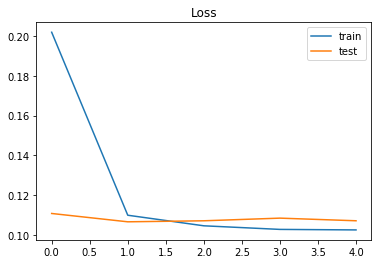

In [23]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

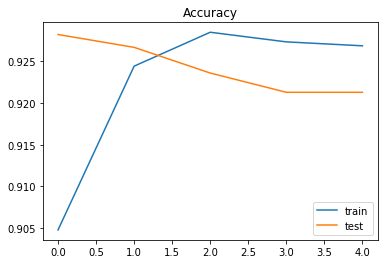

In [24]:
history
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [0]:
def predictor(str):
  new_sms = [str]
  seq = tokenizer.texts_to_sequences(new_sms)
  padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
  pred = model.predict(padded)
  if(np.argmax(pred)) == 0:
    return "Non Financial"
  else:
    return "Financial"

In [0]:
import pickle
filename = '_tokenizer2.0.pkl'
pickle.dump(tokenizer, open(filename, 'wb'))

In [0]:
model.save("_classifier_LSTM2.0.h5")

In [0]:
test_message = ['Step into season with Alkaram Studios spring/summer collection & enjoy designs celebrating spring! with 50% off',
                'Storm Fibre(powered by Cybernet) High Speed Internet +HDTv (unlimited) upto 100mb packages 10mb 1999+tax 20mb 2999+tax 30mb 3999+tax callnow 03208449106',
                "AOA Sir! Today I won't come to office",
                'Bill Payment From: Waqas Amount: SAR 9,938.63 Biller: 018 Date: 2019-12-14 14:11:39',
                "Dear Customer, Online Clearing Cheque amounting to 50,000 has been credited to your BAHL account 0029XXXXX 0n 11-2-20",
                "Bill dated 2020-3-10 for RS 10,000 has been generated for your PTCL fixedline/broadband relationship no. 18651423. The same will reach you by 2020-4-5. Due date: 2020-3-15",
                "Repair ref.no for your car is JC41166545 opened on 2009-11-15 22:29hrs,ETD of your car is 2009-11-16 16:22hrs and est.repair amt is Rs.991 Rgds, Maha Veer Auto Agency",
                "Can you please pay the Electricity bill of Rs 12000 by Monday because tuesday is the due date",
                "PNR:6548444548,TRAIN:7413,DOJ:2013-04-06,FC,ADF-BHRL,Dep:2:25, Wesley,F8 78 , Fare:7955,SC:10.0+PG+INS",
                'Yaar Light a rahe hai k nhe?',
                'OTP is 758621 for the txn of INR 17643.00 at KSRTC on your AXIS bank CREDIT card ending with 3868. Valid till 20:49:27. Do not  share OTP with anyone for security reasons',
                'Amount of Rs 59000 has been debited to your register']
test_result = [0,0,0,1,1,1,1,0,0,0,1,1]

In [0]:
results = []
for t in test_message:
  pred = predictor(t)
  if pred == 'Financial':
    results.append(1)
  else:
    results.append(0)

In [30]:
results

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]

In [0]:
resultPred = pd.DataFrame(columns=['Real','Predicted','Text'])

In [32]:
resultPred['Real'] = test_result
resultPred['Predicted']= results
resultPred['Text']=test_message

resultPred

,Real,Predicted,Text
0,0,0,Step into season with Alkaram Studios spring/s...
1,0,0,Storm Fibre(powered by Cybernet) High Speed In...
2,0,0,AOA Sir! Today I won't come to office
3,1,1,"Bill Payment From: Waqas Amount: SAR 9,938.63 ..."
4,1,1,"Dear Customer, Online Clearing Cheque amountin..."
5,1,0,"Bill dated 2020-3-10 for RS 10,000 has been ge..."
6,1,0,Repair ref.no for your car is JC41166545 opene...
7,0,0,Can you please pay the Electricity bill of Rs ...
8,0,0,"PNR:6548444548,TRAIN:7413,DOJ:2013-04-06,FC,AD..."
9,0,0,Yaar Light a rahe hai k nhe?


In [0]:
testify = "AOA Sir! Today I won't come to office"
seq = tokenizer.texts_to_sequences(testify)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
pred = pred.argmax()

In [34]:
pred

0

In [0]:
import json
with open( 'word_dict.json' , 'w' ) as file:
	json.dump( tokenizer.word_index , file )

In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model(model )

In [0]:
tfmodel = converter.convert()

In [38]:
open ("_classifier_LSTM_android.tflite" , "wb") .write(tfmodel)

1072164